## Problem 4

In [1]:
# Imports
import csv
import numpy as np
import matplotlib.pyplot as plt
import sklearn.discriminant_analysis as skda
import sklearn
import scipy
from sklearn.model_selection import KFold

In [2]:
# Colors and index to use for data
colors = ['#3498DB', '#E74C3C', '#F1C40F']
idx = 0

# Load data
data = []
classes = [[], [], []]
with open('data_3_6.csv') as csvDataFile:
    csvReader = csv.reader(csvDataFile)
    for row in csvReader:
        data.append([float(row[0]), float(row[1]), float(row[2])]) # Not the BEST way of doing this, but mapping float() did weird things.
        if row[2] == '1':
            classes[0].append(list(map(float, row[0:2])))
        elif row[2] == '2':
            classes[1].append(list(map(float, row[0:2])))
        else:
            classes[2].append(list(map(float, row[0:2])))

print("Class 1 length: ", len(classes[0]))
print("Class 2 length: ", len(classes[1]))
print("Class 3 length: ", len(classes[2]))

def print_matrix(m):
    print("Class |  1  |  2  |  3  |")
    print("| 1 |  ", '{0:<5}'.format(m[0][0]), '{0:<5}'.format(m[0][1]), '{0:<5}'.format(m[0][2]))
    print("| 2 |  ", '{0:<5}'.format(m[1][0]), '{0:<5}'.format(m[1][1]), '{0:<5}'.format(m[1][2]))
    print("| 3 |  ", '{0:<5}'.format(m[2][0]), '{0:<5}'.format(m[2][1]), '{0:<5}'.format(m[2][2]))

Class 1 length:  1000
Class 2 length:  500
Class 3 length:  1000


### Naive Bayes Classifier

Confusion Matrix: 
Class |  1  |  2  |  3  |
| 1 |   96    1     6    
| 2 |   0     55    4    
| 3 |   8     5     75   
Best accuracy:  0.904


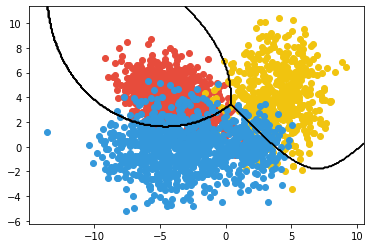

In [3]:
from sklearn.naive_bayes import GaussianNB

# Loop through each class of data and plot in a different color
for c in classes:
    idx = (idx + 1) % 3
    for pt in c:
        plt.scatter(pt[0], pt[1], color=colors[idx])

# Perform 10-fold cross validation
kf = KFold(n_splits=10, shuffle=True)
xvals = np.array(data)[:, 0:2]
yvals = np.array(data)[:, 2]

# Set initial value of accuracy to 0 and confusion matrix blank
accuracy = 0
conf = []

# Run 10-fold cross validation and report stats for run with best accuracy
for train, test in kf.split(xvals):
    correct = 0
    b = GaussianNB()
    b.fit(xvals[train], yvals[train])
    preds = b.predict(xvals[test])
    newconf = sklearn.metrics.confusion_matrix(y_true=yvals[test], y_pred=preds)
    for i in range(0, 3):
        correct += newconf[i][i]
    newacc = correct / len(xvals[test])
    if newacc > accuracy:
        accuracy = newacc
        conf = newconf
    
print("Confusion Matrix: ")
print_matrix(conf)
print("Best accuracy: ", accuracy)
        
# Draw LDA boundaries
nx, ny = 300, 200
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                     np.linspace(y_min, y_max, ny))

Z = b.predict(np.c_[xx.ravel(), yy.ravel()])

# Boundary line
Z1 = Z[:].reshape(xx.shape)
plt.contour(xx, yy, Z1, linewidths=1., colors='k')

### QDA

Confusion Matrix: 
Class |  1  |  2  |  3  |
| 1 |   102   0     5    
| 2 |   1     43    0    
| 3 |   6     6     87   
Best accuracy:  0.928


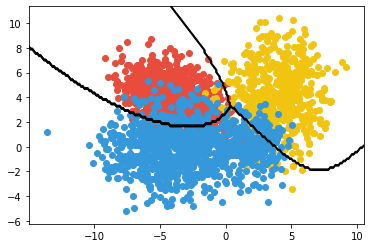

In [4]:
# Loop through each class of data and plot in a different color
for c in classes:
    idx = (idx + 1) % 3
    for pt in c:
        plt.scatter(pt[0], pt[1], color=colors[idx])
        
# Perform 10-fold cross validation
kf = KFold(n_splits=10, shuffle=True)
xvals = np.array(data)[:, 0:2]
yvals = np.array(data)[:, 2]

# Set initial value of accuracy to 0 and confusion matrix blank
accuracy = 0
conf = []

# Run 10-fold cross validation and report stats for run with best accuracy
for train, test in kf.split(xvals):
    correct = 0
    quadratic = skda.QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, store_covariance=False, tol=0.00001)
    quadratic.fit(xvals[train], yvals[train])
    preds = quadratic.predict(xvals[test])
    newconf = sklearn.metrics.confusion_matrix(y_true=yvals[test], y_pred=preds)
    for i in range(0, 3):
        correct += newconf[i][i]
    newacc = correct / len(xvals[test])
    if newacc > accuracy:
        accuracy = newacc
        conf = newconf
    
print("Confusion Matrix: ")
print_matrix(conf)
print("Best accuracy: ", accuracy)
        
# Draw QDA boundaries
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                     np.linspace(y_min, y_max, ny))

Z = quadratic.predict(np.c_[xx.ravel(), yy.ravel()])

# Boundary line
Z1 = Z[:].reshape(xx.shape)
plt.contour(xx, yy, Z1, linewidths=1., colors='k')

### LDA

Confusion Matrix: 
Class |  1  |  2  |  3  |
| 1 |   85    0     8    
| 2 |   0     55    1    
| 3 |   7     6     88   
Best accuracy:  0.912


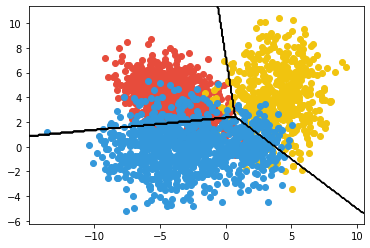

In [5]:
# Loop through each class of data and plot in a different color
for c in classes:
    idx = (idx + 1) % 3
    for pt in c:
        plt.scatter(pt[0], pt[1], color=colors[idx])
        
# Perform 10-fold cross validation
kf = KFold(n_splits=10, shuffle=True)
xvals = np.array(data)[:, 0:2]
yvals = np.array(data)[:, 2]

# Set initial value of accuracy to 0 and confusion matrix blank
accuracy = 0
conf = []

# Run 10-fold cross validation and report stats for run with best accuracy
for train, test in kf.split(xvals):
    correct = 0
    linear = skda.LinearDiscriminantAnalysis()
    linear.fit(xvals[train], yvals[train])
    preds = linear.predict(xvals[test])
    newconf = sklearn.metrics.confusion_matrix(y_true=yvals[test], y_pred=preds)
    for i in range(0, 3):
        correct += newconf[i][i]
    newacc = correct / len(xvals[test])
    if newacc > accuracy:
        accuracy = newacc
        conf = newconf
        
print("Confusion Matrix: ")
print_matrix(conf)
print("Best accuracy: ", accuracy)

# Draw LDA boundaries
nx, ny = 300, 200
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                     np.linspace(y_min, y_max, ny))

Z = linear.predict(np.c_[xx.ravel(), yy.ravel()])

# Boundary line
Z1 = Z[:].reshape(xx.shape)
plt.contour(xx, yy, Z1, linewidths=1., colors='k')